# Regression Plots <a id="10"></a>


> Seaborn is a Python visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics. You can learn more about *seaborn* by following this [link](https://seaborn.pydata.org/) and more about *seaborn* regression plots by following this [link](http://seaborn.pydata.org/generated/seaborn.regplot.html).

Let's first prep our data

In [2]:
#import Numpy and pandas
import numpy as np  
import pandas as pd 

In [5]:
#read in our data
df_can = pd.read_excel('Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=20,
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [6]:
#view top 5 rows
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


**1. Clean up the dataset to remove columns that are not informative to us for visualization (eg. Type, AREA, REG).**

In [7]:
# delete columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


**2. Rename some of the columns so that they make sense.**

In [8]:
#rename columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

**3. Set the country name as index - useful for quickly looking up countries using .loc method**

In [9]:
#set 'Country' as index
df_can.set_index('Country', inplace=True)
df_can.head(3)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331


**4. Add total column.**

In [10]:
#add a 'Total' column that sums up the total immigrants by country over the entire period 1980 - 2013
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


**5. Create a list of years from 1980 - 2013**

In [11]:
#create a list of years to easily slice years columns later
years = list(range(1980, 2014))
years

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013]

### Regression Plot

Let's import seaborn, matplotlib and pyplot.

In [12]:
# if not instaled, install seaborn
#!conda install -c anaconda seaborn --yes

# import libraries
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Seaborn imported!')

Seaborn imported!


Create a new dataframe that stores the total number of landed immigrants to Canada per year from 1980 to 2013.

In [13]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))


# view the final dataframe
df_tot.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [14]:
# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


With *seaborn*, to generate a regression plot call the **regplot** function.

[Text(0,0.5,'Total Immigration'), Text(0.5,0,'Year')]

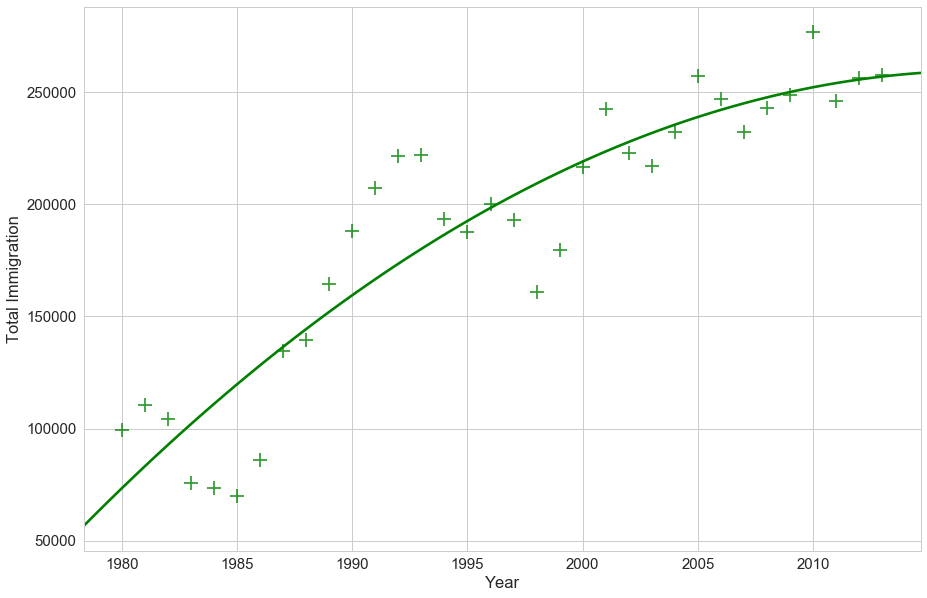

In [25]:
plt.figure(figsize = (15,10))
sns.set(font_scale = 1.5)
sns.set_style('ticks')
sns.set_style('whitegrid')
ax= sns.regplot(x='year', y='total',data = df_tot, 
                color='green', 
                marker ='+',
                scatter_kws={'s':200},
                ci=None,
                order=2
               )

ax.set(xlabel = 'Year', ylabel = 'Total Immigration')

The `residplot()` function can be a useful tool for checking whether the simple regression model is appropriate for a dataset. It fits and removes a simple linear regression and then plots the residual values for each observation. Ideally, these values should be randomly scattered around `y = 0`:

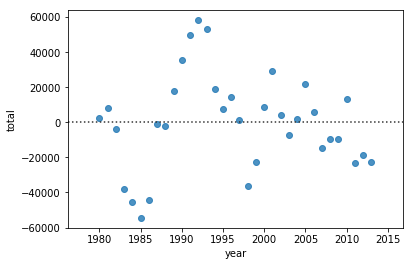

In [16]:
ax= sns.residplot(x='year', y='total',data = df_tot)

**Question**: Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013.

In [ ]:
### type your answer here
# create df_countries dataframe




In [ ]:
# define figure size, background style and font size



In [ ]:
# generate plot and add title and axes labels



In [ ]:
# generate residual plot

